# Defining the question


## a) Specifying the Data Analytic Question
Explore the relationship between the variables identifed in the research and a person's Bank status.

## b) Defining the metric for success
Order the variables by order of their expalaination of the total variance of the data.

## c) Context
The FinAccess household survey is a series of surveys that measure drivers and usage of financial services across different countries. In Kenya, the latest survey in the series was conducted in 2019 but previous studies were conducted in 2006, 2009, 2013, and 2016.
The main data set used in this project contains data of different individuals from Kenya, Rwanda, Uganda, and Tanzania collected between 2016 and 2019. The main focus of the study was to examine the levels of financial inclusion in the aforementioned countries but additional data was collected regarding the respondent's gender, age, cell phone access, household size, marital status, relationshio with the head , level of education, and the type of job.

##d) Recording the experimental design
This project will adopt multiple techniques including univariate analysis, bivariate analysis, and multivariate analysis to identfy different relationship patterns in the dataset.

# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading and previewing the dataset

In [2]:
dataset = files.upload()

Saving Financial Dataset .csv to Financial Dataset .csv


In [3]:
financial_dataset = pd.read_csv('Financial Dataset .csv')

In [4]:
#checking dataframe shape
financial_dataset.shape

(23524, 13)

In [5]:
#previewing the top of the dataset
financial_dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
#previewing the bottom of the dataset
financial_dataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
#checking column data types
financial_dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Tidying the dataset

In [8]:
#renaming columns
financial_dataset.columns = ['Country', 
                             'Year',
                             'ID',
                             'Bank',
                             'Location Type',
                             'Cell Phone Access',
                             'Household Size',
                             'Age',
                             'Gender',
                             'Relation with Head',
                             'Marital Status',
                             'Education Level',
                             'Job Type']

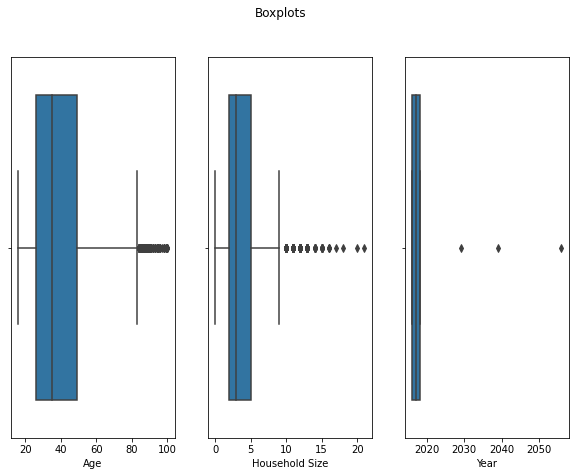

In [9]:
#checking for outliers
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,7), sharey=True)
fig.suptitle('Boxplots')
sns.boxplot(financial_dataset['Age'], ax=ax1)
sns.boxplot(financial_dataset['Household Size'], ax=ax2)
sns.boxplot(financial_dataset['Year'], ax=ax3)
plt.show()

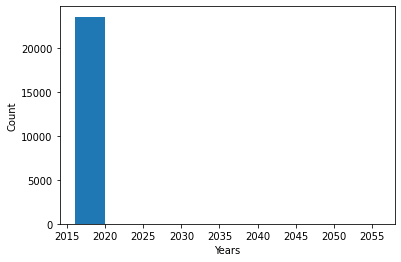

In [10]:
#checking anomalies
plt.hist(financial_dataset['Year'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

In [11]:
#removing anomally
q1_year, q3_year = np.percentile(financial_dataset['Year'], [25, 75])
iqr_year = q3_year - q1_year
upper_year = q3_year + (1.5 * iqr_year)
financial_dataset = financial_dataset.drop(financial_dataset[financial_dataset['Year'] > upper_year].index)
financial_dataset.shape

(23521, 13)

In [12]:
# checking for missing values
financial_dataset.isnull().sum()

Country               14
Year                   0
ID                     0
Bank                  36
Location Type         15
Cell Phone Access     11
Household Size        28
Age                   34
Gender                34
Relation with Head     4
Marital Status        32
Education Level       29
Job Type              30
dtype: int64

In [13]:
# dropping all null values
financial_dataset1 = financial_dataset.dropna()
print('With null:', financial_dataset.shape)
print('Without null:', financial_dataset1.shape)

With null: (23521, 13)
Without null: (23340, 13)


In [14]:
financial_dataset1.isnull().sum()

Country               0
Year                  0
ID                    0
Bank                  0
Location Type         0
Cell Phone Access     0
Household Size        0
Age                   0
Gender                0
Relation with Head    0
Marital Status        0
Education Level       0
Job Type              0
dtype: int64

In [15]:
#convert household size and age columns to integer
financial_dataset1 = financial_dataset1.astype({'Age': int, 'Household Size': int})
financial_dataset1.dtypes

Country               object
Year                   int64
ID                    object
Bank                  object
Location Type         object
Cell Phone Access     object
Household Size         int64
Age                    int64
Gender                object
Relation with Head    object
Marital Status        object
Education Level       object
Job Type              object
dtype: object

In [16]:
# compute iqr score to remove outliers for age and household size
q1_age, q3_age = np.percentile(financial_dataset1['Age'], [25, 75])
q1_household, q3_household = np.percentile(financial_dataset1['Household Size'], [25, 75])
iqr_age = q3_age - q1_age
iqr_household = q3_household - q1_household

lower_age = q1_age - (1.5 * iqr_age)
upper_age = q3_age + (1.5 * iqr_age)
lower_household = q1_household - (1.5 * iqr_household)
upper_household = q3_household + (1.5 * iqr_household)

In [17]:
#removing outliers
print(financial_dataset1.shape, ': With outliers')

financial_dataset1 = financial_dataset1.drop(financial_dataset1[financial_dataset1['Age'] > upper_age].index)
financial_dataset1 = financial_dataset1.drop(financial_dataset1[financial_dataset1['Household Size'] > upper_household].index)

print(financial_dataset1.shape, ': No outliers')

(23340, 13) : With outliers
(22725, 13) : No outliers


In [18]:
#checking if unique values in categorical columns match data description
print(financial_dataset1['Year'].unique())
print(financial_dataset1['Education Level'].unique())
print(financial_dataset1['Job Type'].unique())
print(financial_dataset1['Relation with Head'].unique())
print(financial_dataset1['Marital Status'].unique())
print(financial_dataset1['Gender'].unique())
print(financial_dataset1['Location Type'].unique())
print(financial_dataset1['Bank'].unique())
print(financial_dataset1['Cell Phone Access'].unique())

[2018 2016 2017]
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
['Female' 'Male']
['Rural' 'Urban']
['Yes' 'No']
['Yes' 'No']


In [19]:
#checking the rows with '6' as level of education from the data
print(financial_dataset1.loc[financial_dataset1['Education Level'] == '6'].shape)

#drop the rows with '6' as level of education from the dataset
financial_dataset1.drop(financial_dataset1[financial_dataset1['Education Level'] == '6'].index, inplace=True)

(25, 13)


In [20]:
# checking info of cleaned dataset
clean_financial_dataset = financial_dataset1
clean_financial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22700 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             22700 non-null  object
 1   Year                22700 non-null  int64 
 2   ID                  22700 non-null  object
 3   Bank                22700 non-null  object
 4   Location Type       22700 non-null  object
 5   Cell Phone Access   22700 non-null  object
 6   Household Size      22700 non-null  int64 
 7   Age                 22700 non-null  int64 
 8   Gender              22700 non-null  object
 9   Relation with Head  22700 non-null  object
 10  Marital Status      22700 non-null  object
 11  Education Level     22700 non-null  object
 12  Job Type            22700 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.4+ MB


#Data formatting

In [21]:
#mapping binary categories for multivariate
clean_financial_encoded = clean_financial_dataset.copy()
clean_financial_encoded['Gender'] = clean_financial_encoded['Gender'].map({'Female': 1, 'Male': 0})
clean_financial_encoded['Cell Phone Access'] = clean_financial_encoded['Cell Phone Access'].map({'Yes': 1,'No': 0})
clean_financial_encoded['Location Type'] = clean_financial_encoded['Location Type'].map({'Urban': 1,'Rural': 0})
clean_financial_encoded['Bank'] = clean_financial_encoded['Bank'].map({'Yes': 1,'No': 0})

clean_financial_encoded.head()

,Country,Year,ID,Bank,Location Type,Cell Phone Access,Household Size,Age,Gender,Relation with Head,Marital Status,Education Level,Job Type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed


In [22]:
#mapping categories values
encoded_country = pd.get_dummies(clean_financial_encoded['Country'], prefix='Country')
encoded_relation = pd.get_dummies(clean_financial_encoded['Relation with Head'], prefix='Relation')
encoded_marital = pd.get_dummies(clean_financial_encoded['Marital Status'], prefix='Marital')
encoded_education = pd.get_dummies(clean_financial_encoded['Education Level'], prefix='Education')
encoded_job = pd.get_dummies(clean_financial_encoded['Job Type'], prefix='Job')


clean_financial_encoded = pd.concat([clean_financial_encoded, encoded_country, encoded_relation, encoded_marital, encoded_education, encoded_job], axis=1, sort=False)
clean_financial_encoded

,Country,Year,ID,Bank,Location Type,Cell Phone Access,Household Size,Age,Gender,Relation with Head,Marital Status,Education Level,Job Type,Country_Kenya,Country_Rwanda,Country_Tanzania,Country_Uganda,Relation_Child,Relation_Head of Household,Relation_Other non-relatives,Relation_Other relative,Relation_Parent,Relation_Spouse,Marital_Divorced/Seperated,Marital_Dont know,Marital_Married/Living together,Marital_Single/Never Married,Marital_Widowed,Education_No formal education,Education_Other/Dont know/RTA,Education_Primary education,Education_Secondary education,Education_Tertiary education,Education_Vocational/Specialised training,Job_Dont Know/Refuse to answer,Job_Farming and Fishing,Job_Formally employed Government,Job_Formally employed Private,Job_Government Dependent,Job_Informally employed,Job_No Income,Job_Other Income,Job_Remittance Dependent,Job_Self employed
0,Kenya,2018,uniqueid_1,1,0,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_2,0,0,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,uniqueid_4,0,0,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,0,0,0,2,57,1,Head of Household,Divorced/Seperated,No formal education,Other Income,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,1,Head of Household,Divorced/Seperated,No formal education,Other Income,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,1,Head of Household,Single/Never Married,Secondary education,Other Income,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,1,Parent,Widowed,Primary education,Other Income,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
#checking info of cleaned datset
clean_financial_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22700 entries, 0 to 23522
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Country                                    22700 non-null  object
 1   Year                                       22700 non-null  int64 
 2   ID                                         22700 non-null  object
 3   Bank                                       22700 non-null  int64 
 4   Location Type                              22700 non-null  int64 
 5   Cell Phone Access                          22700 non-null  int64 
 6   Household Size                             22700 non-null  int64 
 7   Age                                        22700 non-null  int64 
 8   Gender                                     22700 non-null  int64 
 9   Relation with Head                         22700 non-null  object
 10  Marital Status                    

# Exploratory Analysis

## 1) Univariate analysis

In [24]:
# grouping dataset to get only individuals with bank accounts
bankers = clean_financial_dataset.groupby('Bank').get_group('Yes')

#creating frequency tables
bankers_country = bankers['Country'].value_counts()
bankers_gender = bankers['Gender'].value_counts()
bankers_location = bankers['Location Type'].value_counts()
bankers_cell = bankers['Cell Phone Access'].value_counts()
bankers_marital = bankers['Marital Status'].value_counts()
bankers_education = bankers['Education Level'].value_counts()

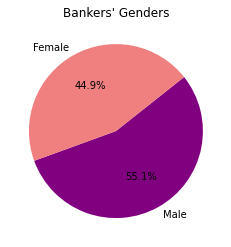

In [25]:
# plotting pie chart of each variable
labels = ['Male', 'Female']
plt.pie(bankers_gender, autopct='%1.1f%%', shadow=False, startangle=200, labels=labels, colors=['purple', 'lightcoral'])
plt.title("Bankers' Genders")
plt.show()

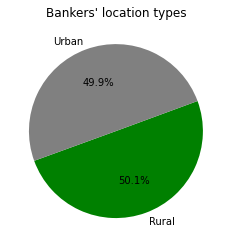

In [26]:
labels = ['Rural', 'Urban']
plt.pie(bankers_location, autopct='%1.1f%%', shadow=False, startangle=200, labels=labels, colors=['green', 'grey'])
plt.title("Bankers' location types")
plt.show()


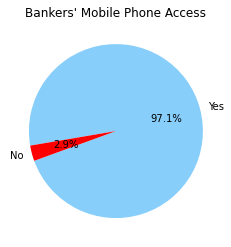

In [27]:
labels = ['Yes', 'No']
plt.pie(bankers_cell, autopct='%1.1f%%', shadow=False, startangle=200, labels=labels, colors=['lightskyblue', 'red'])
plt.title("Bankers' Mobile Phone Access")
plt.show()

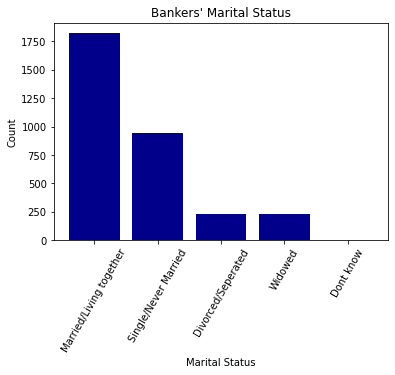

In [28]:
marital = pd.DataFrame(bankers_marital)
plt.bar(marital.index, marital['Marital Status'], color='darkblue')
plt.xticks(rotation=60)
plt.title("Bankers' Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

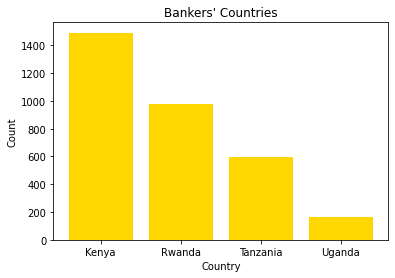

In [29]:
countries = pd.DataFrame(bankers_country)
plt.bar(countries.index, countries['Country'], color='gold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title("Bankers' Countries")
plt.show()

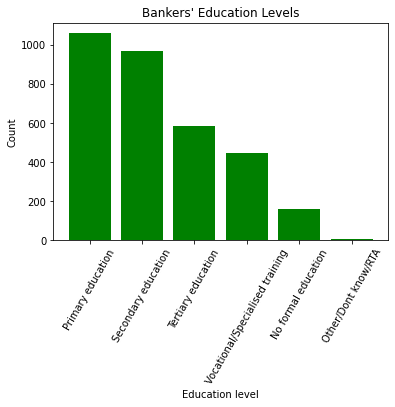

In [30]:
education = pd.DataFrame(bankers_education)
plt.bar(education.index, education['Education Level'], color='green')
plt.xticks(rotation=60)
plt.xlabel('Education level')
plt.ylabel('Count')
plt.title("Bankers' Education Levels")
plt.show()

## 2) Bivariate analysis


In [31]:
#selecting numerical columns for scatter plot and correlation heat map
financial_encoded = clean_financial_encoded.copy()
numerical = financial_encoded[['Bank', 'Household Size', 'Age']]
numerical.head()

,Bank,Household Size,Age
0,1,3,24
1,0,5,70
2,1,5,26
3,0,5,34
4,0,8,26


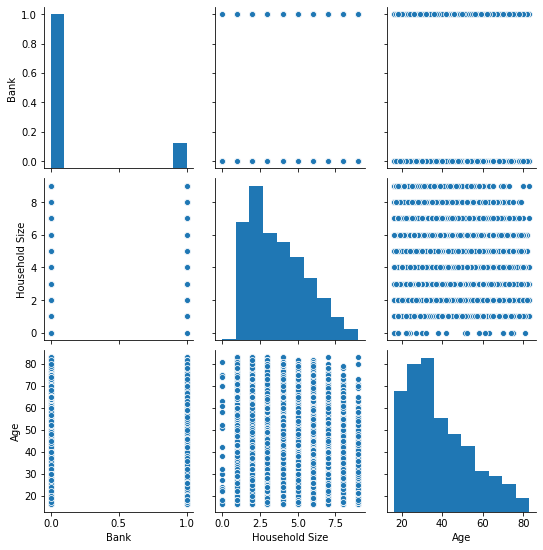

In [32]:
sns.pairplot(numerical)
plt.show()

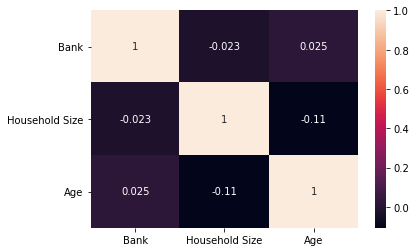

In [33]:
sns.heatmap(numerical.corr(), annot=True)
plt.show()

In [34]:
#selecting individuals 
non_bankers = clean_financial_dataset.groupby('Bank').get_group('No')

In [35]:
#creating frequency tables
non_bankers_country = non_bankers['Country'].value_counts()
non_bankers_gender = non_bankers['Gender'].value_counts()
non_bankers_location = non_bankers['Location Type'].value_counts()
non_bankers_cell = non_bankers['Cell Phone Access'].value_counts()
non_bankers_marital = non_bankers['Marital Status'].value_counts()
non_bankers_education = bankers['Education Level'].value_counts()

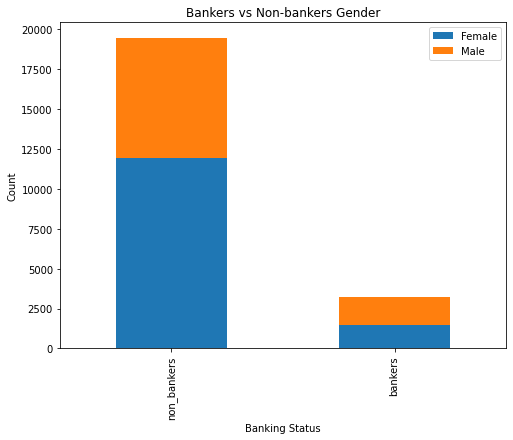

In [36]:
#plotting gender against bank status 
non_bankers_gender = pd.DataFrame(non_bankers_gender).transpose()
non_bankers_gender = non_bankers_gender.rename(index={'Gender':'non_bankers'})
combined = non_bankers_gender.append(bankers_gender).rename(index={'Gender':'bankers'})
combined

combined.plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('Bankers vs Non-bankers Gender')
plt.xlabel('Banking Status')
plt.ylabel('Count')
plt.show()

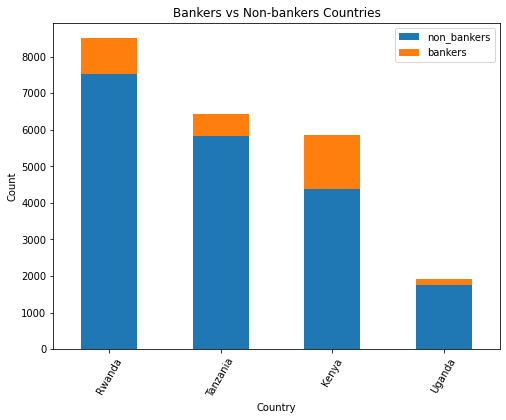

In [37]:
#plotting country against bank status 
non_bankers_country = pd.DataFrame(non_bankers_country).transpose()
non_bankers_country = non_bankers_country.rename(index={'Country':'non_bankers'})
combined = non_bankers_country.append(bankers_country).rename(index={'Country':'bankers'}).transpose()

combined.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xticks(rotation=60)
plt.title('Bankers vs Non-bankers Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

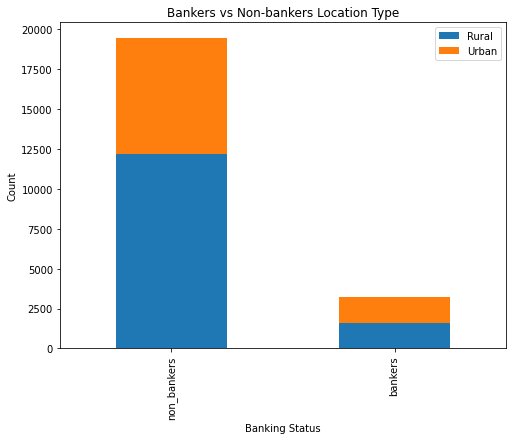

In [38]:
#plotting location against bank status 
non_bankers_location = pd.DataFrame(non_bankers_location).transpose()
non_bankers_location = non_bankers_location.rename(index={'Location Type':'non_bankers'})
combined = non_bankers_location.append(bankers_location).rename(index={'Location Type':'bankers'})
combined

combined.plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('Bankers vs Non-bankers Location Type')
plt.xlabel('Banking Status')
plt.ylabel('Count')
plt.show()

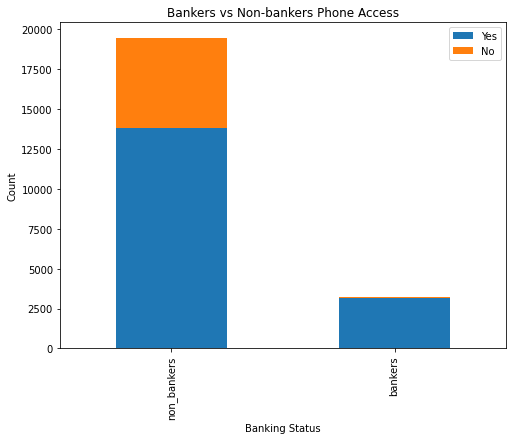

In [39]:
#plotting cell phone access against bank status 
non_bankers_cell = pd.DataFrame(non_bankers_cell).transpose()
non_bankers_cell = non_bankers_cell.rename(index={'Cell Phone Access':'non_bankers'})
combined = non_bankers_cell.append(bankers_cell).rename(index={'Cell Phone Access':'bankers'})
combined

combined.plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('Bankers vs Non-bankers Phone Access')
plt.xlabel('Banking Status')
plt.ylabel('Count')
plt.show()

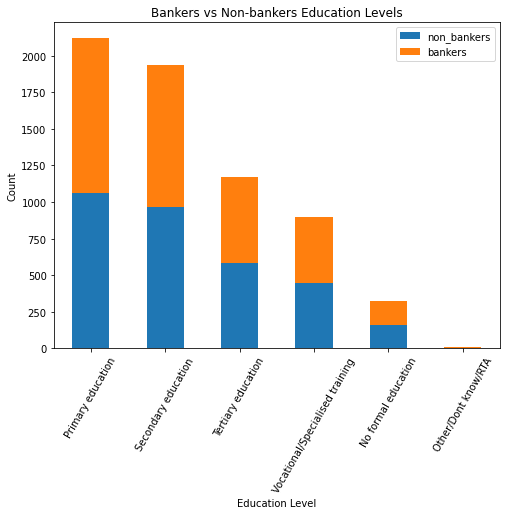

In [40]:
#plotting education level against bank status 
non_bankers_education = pd.DataFrame(non_bankers_education).transpose()
non_bankers_education = non_bankers_education.rename(index={'Education Level':'non_bankers'})
combined = non_bankers_education.append(bankers_education).rename(index={'Education Level':'bankers'}).transpose()
combined

combined.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xticks(rotation=60)
plt.title('Bankers vs Non-bankers Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

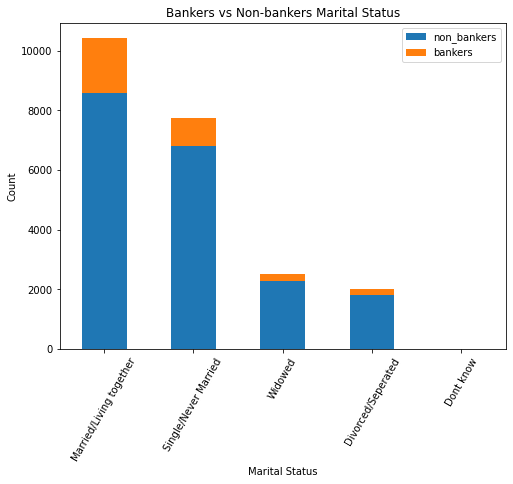

In [41]:
#plotting marital status against bank status 
non_bankers_marital = pd.DataFrame(non_bankers_marital).transpose()
non_bankers_marital = non_bankers_marital.rename(index={'Marital Status':'non_bankers'})
combined = non_bankers_marital.append(bankers_marital).rename(index={'Marital Status':'bankers'}).transpose()
combined

combined.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xticks(rotation=60)
plt.title('Bankers vs Non-bankers Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## 3) Multivariate analyis
To explore the relationship between the different variables and the bank status, performing a principal component analysis seemed the most logical to identify the weight of each of the variables on an individual's bank status. An advantage of this technique is that it accomodates the use of both numerical and categorical values provided the latter are mapped to numerical values.

In [42]:
#Multivariate summaries
financial_encoded.head()

,Country,Year,ID,Bank,Location Type,Cell Phone Access,Household Size,Age,Gender,Relation with Head,Marital Status,Education Level,Job Type,Country_Kenya,Country_Rwanda,Country_Tanzania,Country_Uganda,Relation_Child,Relation_Head of Household,Relation_Other non-relatives,Relation_Other relative,Relation_Parent,Relation_Spouse,Marital_Divorced/Seperated,Marital_Dont know,Marital_Married/Living together,Marital_Single/Never Married,Marital_Widowed,Education_No formal education,Education_Other/Dont know/RTA,Education_Primary education,Education_Secondary education,Education_Tertiary education,Education_Vocational/Specialised training,Job_Dont Know/Refuse to answer,Job_Farming and Fishing,Job_Formally employed Government,Job_Formally employed Private,Job_Government Dependent,Job_Informally employed,Job_No Income,Job_Other Income,Job_Remittance Dependent,Job_Self employed
0,Kenya,2018,uniqueid_1,1,0,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_2,0,0,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,uniqueid_4,0,0,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [43]:
#assigning features and the label
X = financial_encoded.drop(['ID', 'Bank', 'Country', 'Relation with Head', 'Marital Status', 'Education Level', 'Job Type'], axis=1)
y = financial_encoded['Bank']

In [44]:
#splitting the dataset to train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [45]:
#normalizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
#applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [47]:
#highlighting the explained variance of each feature
print('Explained Variance', pca.explained_variance_ratio_)

Explained Variance [1.00861740e-01 7.41862552e-02 6.99722294e-02 5.90430745e-02
 5.21348749e-02 4.43648111e-02 4.09041153e-02 3.86846278e-02
 3.49279530e-02 3.30464850e-02 2.96816635e-02 2.80660174e-02
 2.74958939e-02 2.73869271e-02 2.70364958e-02 2.69586123e-02
 2.68438829e-02 2.65861767e-02 2.61894273e-02 2.54628825e-02
 2.46571066e-02 2.24800601e-02 2.14713169e-02 2.05331477e-02
 1.78530068e-02 1.64669342e-02 1.37150998e-02 1.24267752e-02
 1.14635653e-02 1.03334361e-02 8.76540602e-03 2.13967223e-31
 5.67369573e-33 3.91941891e-33 3.65545830e-33 2.46750007e-33
 1.46105393e-34]


In [48]:
#finding ideal number of principal components
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=43)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [50]:
#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3888    0]
 [ 652    0]]
Accuracy 0.8563876651982378


From the experiment, our prediction model achieved optimal accuracy with one principal component with an accuracy level of 85.63%.

# Challenging the result
In this experiment, I adopted principal componet analysis which is ideally suited for continuos data but also works with binary categorical variables. To challenge the solution, I would like to perform a multiple correspondence analysis which is more suited for categorical data.
